In [30]:
import numpy as np
import pandas as pd

In [31]:
books = pd.read_csv('prepared_data_book.csv')
comments = pd.read_csv('comments_cleaned_20250903_233541.csv')

# Remove avg_rating column from books to avoid merge conflicts
if 'avg_rating' in books.columns:
    books = books.drop(columns=['avg_rating'])

print("Books columns:", books.columns.tolist())

Books columns: ['Unnamed: 0', 'product_id', 'title', 'authors', 'original_price', 'current_price', 'quantity', 'category', 'n_review', 'pages', 'manufacturer', 'cover_link', 'discount']


In [32]:
books['cover_link'][1]

'https://salt.tikicdn.com/ts/product/d7/99/24/17bff8d26027846b2d7478ad4ba83fea.jpg'

In [33]:
comments.head()

,product_id,comment_id,title,thank_count,customer_id,rating,content
0,74021317,12559756,Cực kì hài lòng,313,22051463,5,"Có những người bước đến, họ lấp đầy hạnh phúc ..."
1,74021317,16979365,Cực kì hài lòng,6,27791831,5,"Thấy nhiều bạn chê tiki gói hàng quá, may sao ..."
2,74021317,14069617,Cực kì hài lòng,25,17748750,5,"Bìa cực xinh, tiki giao hàng nhanh, sách không..."
3,74021317,8569824,Cực kì hài lòng,57,410797,5,"Sách lúc nhận hình thức rất ổn, không cong vên..."
4,74021317,18368714,Cực kì hài lòng,0,28545286,5,Một cuốn sách rất đáng đọc về tình yêu thương ...


In [5]:
print(books.shape)
print(comments.shape)

(1767, 13)
(107524, 7)


In [6]:
books.isnull().sum()

Unnamed: 0        0
product_id        0
title             0
authors           0
original_price    0
current_price     0
quantity          0
category          0
n_review          0
pages             0
manufacturer      0
cover_link        0
discount          0
dtype: int64

In [7]:
comments.isnull().sum()

product_id         0
comment_id         0
title              3
thank_count        0
customer_id        0
rating             0
content        30988
dtype: int64

## Popularity Based Recommender System

In [34]:
ratings_with_name = (
    comments.drop(columns=['title'])
            .merge(books, on='product_id')
            .rename(columns={'title': 'book_title'})
)
ratings_with_name


,product_id,comment_id,thank_count,customer_id,rating,content,Unnamed: 0,book_title,authors,original_price,current_price,quantity,category,n_review,pages,manufacturer,cover_link,discount
0,74021317,12559756,313,22051463,5,"Có những người bước đến, họ lấp đầy hạnh phúc ...",0,Cây Cam Ngọt Của Tôi,José Mauro de Vasconcelos,4.56,2.73,53075,Tiểu Thuyết,11481,244,Nhà Xuất Bản Hội Nhà Văn,https://salt.tikicdn.com/ts/product/5e/18/24/2...,0.40
1,74021317,16979365,6,27791831,5,"Thấy nhiều bạn chê tiki gói hàng quá, may sao ...",0,Cây Cam Ngọt Của Tôi,José Mauro de Vasconcelos,4.56,2.73,53075,Tiểu Thuyết,11481,244,Nhà Xuất Bản Hội Nhà Văn,https://salt.tikicdn.com/ts/product/5e/18/24/2...,0.40
2,74021317,14069617,25,17748750,5,"Bìa cực xinh, tiki giao hàng nhanh, sách không...",0,Cây Cam Ngọt Của Tôi,José Mauro de Vasconcelos,4.56,2.73,53075,Tiểu Thuyết,11481,244,Nhà Xuất Bản Hội Nhà Văn,https://salt.tikicdn.com/ts/product/5e/18/24/2...,0.40
3,74021317,8569824,57,410797,5,"Sách lúc nhận hình thức rất ổn, không cong vên...",0,Cây Cam Ngọt Của Tôi,José Mauro de Vasconcelos,4.56,2.73,53075,Tiểu Thuyết,11481,244,Nhà Xuất Bản Hội Nhà Văn,https://salt.tikicdn.com/ts/product/5e/18/24/2...,0.40
4,74021317,18368714,0,28545286,5,Một cuốn sách rất đáng đọc về tình yêu thương ...,0,Cây Cam Ngọt Của Tôi,José Mauro de Vasconcelos,4.56,2.73,53075,Tiểu Thuyết,11481,244,Nhà Xuất Bản Hội Nhà Văn,https://salt.tikicdn.com/ts/product/5e/18/24/2...,0.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107519,58971672,16391630,0,6625296,5,NaN,1795,The Best of Chicken Soup - Tuyển Tập Những Câu...,Jack Canfield,5.82,3.84,954,Sách nghệ thuật sống đẹp,176,256,Nhà Xuất Bản Tổng hợp TP.HCM,https://salt.tikicdn.com/media/catalog/product...,0.34
107520,58971672,12767000,0,16435374,5,Tuyệt vời lắm,1795,The Best of Chicken Soup - Tuyển Tập Những Câu...,Jack Canfield,5.82,3.84,954,Sách nghệ thuật sống đẹp,176,256,Nhà Xuất Bản Tổng hợp TP.HCM,https://salt.tikicdn.com/media/catalog/product...,0.34
107521,58971672,16322348,0,10549708,5,NaN,1795,The Best of Chicken Soup - Tuyển Tập Những Câu...,Jack Canfield,5.82,3.84,954,Sách nghệ thuật sống đẹp,176,256,Nhà Xuất Bản Tổng hợp TP.HCM,https://salt.tikicdn.com/media/catalog/product...,0.34
107522,58971672,16288080,0,14487833,5,NaN,1795,The Best of Chicken Soup - Tuyển Tập Những Câu...,Jack Canfield,5.82,3.84,954,Sách nghệ thuật sống đẹp,176,256,Nhà Xuất Bản Tổng hợp TP.HCM,https://salt.tikicdn.com/media/catalog/product...,0.34


In [35]:
ratings_with_name = ratings_with_name.drop(columns=['Unnamed: 0'])



In [36]:
ratings_with_name

,product_id,comment_id,thank_count,customer_id,rating,content,book_title,authors,original_price,current_price,quantity,category,n_review,pages,manufacturer,cover_link,discount
0,74021317,12559756,313,22051463,5,"Có những người bước đến, họ lấp đầy hạnh phúc ...",Cây Cam Ngọt Của Tôi,José Mauro de Vasconcelos,4.56,2.73,53075,Tiểu Thuyết,11481,244,Nhà Xuất Bản Hội Nhà Văn,https://salt.tikicdn.com/ts/product/5e/18/24/2...,0.40
1,74021317,16979365,6,27791831,5,"Thấy nhiều bạn chê tiki gói hàng quá, may sao ...",Cây Cam Ngọt Của Tôi,José Mauro de Vasconcelos,4.56,2.73,53075,Tiểu Thuyết,11481,244,Nhà Xuất Bản Hội Nhà Văn,https://salt.tikicdn.com/ts/product/5e/18/24/2...,0.40
2,74021317,14069617,25,17748750,5,"Bìa cực xinh, tiki giao hàng nhanh, sách không...",Cây Cam Ngọt Của Tôi,José Mauro de Vasconcelos,4.56,2.73,53075,Tiểu Thuyết,11481,244,Nhà Xuất Bản Hội Nhà Văn,https://salt.tikicdn.com/ts/product/5e/18/24/2...,0.40
3,74021317,8569824,57,410797,5,"Sách lúc nhận hình thức rất ổn, không cong vên...",Cây Cam Ngọt Của Tôi,José Mauro de Vasconcelos,4.56,2.73,53075,Tiểu Thuyết,11481,244,Nhà Xuất Bản Hội Nhà Văn,https://salt.tikicdn.com/ts/product/5e/18/24/2...,0.40
4,74021317,18368714,0,28545286,5,Một cuốn sách rất đáng đọc về tình yêu thương ...,Cây Cam Ngọt Của Tôi,José Mauro de Vasconcelos,4.56,2.73,53075,Tiểu Thuyết,11481,244,Nhà Xuất Bản Hội Nhà Văn,https://salt.tikicdn.com/ts/product/5e/18/24/2...,0.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107519,58971672,16391630,0,6625296,5,NaN,The Best of Chicken Soup - Tuyển Tập Những Câu...,Jack Canfield,5.82,3.84,954,Sách nghệ thuật sống đẹp,176,256,Nhà Xuất Bản Tổng hợp TP.HCM,https://salt.tikicdn.com/media/catalog/product...,0.34
107520,58971672,12767000,0,16435374,5,Tuyệt vời lắm,The Best of Chicken Soup - Tuyển Tập Những Câu...,Jack Canfield,5.82,3.84,954,Sách nghệ thuật sống đẹp,176,256,Nhà Xuất Bản Tổng hợp TP.HCM,https://salt.tikicdn.com/media/catalog/product...,0.34
107521,58971672,16322348,0,10549708,5,NaN,The Best of Chicken Soup - Tuyển Tập Những Câu...,Jack Canfield,5.82,3.84,954,Sách nghệ thuật sống đẹp,176,256,Nhà Xuất Bản Tổng hợp TP.HCM,https://salt.tikicdn.com/media/catalog/product...,0.34
107522,58971672,16288080,0,14487833,5,NaN,The Best of Chicken Soup - Tuyển Tập Những Câu...,Jack Canfield,5.82,3.84,954,Sách nghệ thuật sống đẹp,176,256,Nhà Xuất Bản Tổng hợp TP.HCM,https://salt.tikicdn.com/media/catalog/product...,0.34


In [37]:
num_rating_df = ratings_with_name.groupby('book_title').count()['rating'].reset_index()
num_rating_df.rename(columns={'rating':'num_ratings'},inplace=True)
num_rating_df

,book_title,num_ratings
0,Cứ Làm Đi!,90
1,Để Trở Thành Người Bán Hàng Giỏi Nhất Thế Giới,90
2,"""999 Lá Thư Gửi Cho Chính Mình” - Phiên Bản Mini",72
3,"""Cậu"" Ma Nhà Xí Hanako - Tập 0",59
4,"""Đức Phật"" nơi công sở",1
...,...,...
1734,Ổn Định Hay Tự Do,90
1735,Ở Quán Cà Phê Của Tuổi Trẻ Lạc Lối (Tái Bản),90
1736,Ở nơi quỷ sứ giặc non,1
1737,Ủ Một Miền Thơm,22


In [38]:
avg_rating_df = ratings_with_name.groupby('book_title')['rating'].mean().reset_index()
avg_rating_df.rename(columns={'rating':'avg_rating'}, inplace=True)
avg_rating_df

,book_title,avg_rating
0,Cứ Làm Đi!,4.633333
1,Để Trở Thành Người Bán Hàng Giỏi Nhất Thế Giới,4.744444
2,"""999 Lá Thư Gửi Cho Chính Mình” - Phiên Bản Mini",4.791667
3,"""Cậu"" Ma Nhà Xí Hanako - Tập 0",4.813559
4,"""Đức Phật"" nơi công sở",5.000000
...,...,...
1734,Ổn Định Hay Tự Do,4.477778
1735,Ở Quán Cà Phê Của Tuổi Trẻ Lạc Lối (Tái Bản),4.722222
1736,Ở nơi quỷ sứ giặc non,5.000000
1737,Ủ Một Miền Thơm,4.909091


In [39]:
popular_df = num_rating_df.merge(avg_rating_df,on='book_title')
popular_df

,book_title,num_ratings,avg_rating
0,Cứ Làm Đi!,90,4.633333
1,Để Trở Thành Người Bán Hàng Giỏi Nhất Thế Giới,90,4.744444
2,"""999 Lá Thư Gửi Cho Chính Mình” - Phiên Bản Mini",72,4.791667
3,"""Cậu"" Ma Nhà Xí Hanako - Tập 0",59,4.813559
4,"""Đức Phật"" nơi công sở",1,5.000000
...,...,...,...
1734,Ổn Định Hay Tự Do,90,4.477778
1735,Ở Quán Cà Phê Của Tuổi Trẻ Lạc Lối (Tái Bản),90,4.722222
1736,Ở nơi quỷ sứ giặc non,1,5.000000
1737,Ủ Một Miền Thơm,22,4.909091


In [40]:
record = popular_df[popular_df['book_title'] == 'Cây Cam Ngọt Của Tôi']
print(record)


               book_title  num_ratings  avg_rating
397  Cây Cam Ngọt Của Tôi           90    4.511111


In [41]:
popular_df = popular_df[popular_df['num_ratings']>=70].sort_values('avg_rating',ascending=False).head(50)

In [42]:
popular_df


,book_title,num_ratings,avg_rating
749,Kinh Địa Tạng,90,4.988889
844,Lối Tắt Khởi Nghiệp - Con Đường Ngắn Từ Tay Tr...,90,4.977778
193,Bồ Câu Bay Đi Tìm Bà,90,4.977778
889,Muốn An Được An (Tái bản 2021),90,4.977778
1619,Vừa Nhắm Mắt Vừa Mở Cửa Số,79,4.974684
91,Black Jack - Tập 12,75,4.973333
1076,OSHO - Cảm Xúc,90,4.966667
432,Cậu Khiến Tôi “Phát Rồ” - There Is No Other,84,4.964286
361,Con Yêu Bố Chừng Nào,72,4.958333
625,Husky Và Sư Tôn Mèo Trắng Của Hắn - Tập 3,90,4.955556


In [43]:
popular_df.shape

(50, 3)

In [44]:
popular_df = (
    popular_df
    .merge(books, left_on='book_title', right_on='title')
    .drop_duplicates('book_title')
    [['book_title','authors','cover_link','num_ratings','avg_rating']]
)

In [45]:
popular_df

,book_title,authors,cover_link,num_ratings,avg_rating
0,Kinh Địa Tạng,Thích Nhật Từ,https://salt.tikicdn.com/media/catalog/product...,90,4.988889
1,Lối Tắt Khởi Nghiệp - Con Đường Ngắn Từ Tay Tr...,Dane,https://salt.tikicdn.com/ts/product/5f/23/30/c...,90,4.977778
2,Bồ Câu Bay Đi Tìm Bà,Walter Macken,https://salt.tikicdn.com/ts/product/1c/ae/ed/d...,90,4.977778
3,Muốn An Được An (Tái bản 2021),Thích Nhất Hạnh,https://salt.tikicdn.com/ts/product/58/d7/c0/1...,90,4.977778
4,Vừa Nhắm Mắt Vừa Mở Cửa Số,Nguyễn Ngọc Thuần,https://salt.tikicdn.com/ts/product/c5/3f/9b/2...,79,4.974684
5,Black Jack - Tập 12,Osamu Tezuka,https://salt.tikicdn.com/ts/product/bf/8e/99/2...,75,4.973333
6,OSHO - Cảm Xúc,Osho,https://salt.tikicdn.com/media/catalog/product...,90,4.966667
7,Cậu Khiến Tôi “Phát Rồ” - There Is No Other,Yama Wayama,https://salt.tikicdn.com/ts/product/7c/76/18/4...,84,4.964286
8,Con Yêu Bố Chừng Nào,Anita Jeram,https://salt.tikicdn.com/ts/product/2a/cf/14/a...,72,4.958333
9,Husky Và Sư Tôn Mèo Trắng Của Hắn - Tập 3,Nhục Bao Bất Cật Nhục,https://salt.tikicdn.com/ts/product/68/c1/79/d...,90,4.955556


In [20]:
popular_df['cover_link'][0]

'https://salt.tikicdn.com/media/catalog/producttmp/f5/f4/66/646727e80692270721b490b0d69f79f3.jpg'

## Collaborative Filtering Item-Based Recommender System

In [66]:
ratings_with_name

,product_id,comment_id,thank_count,customer_id,rating,content,book_title,authors,original_price,current_price,quantity,category,n_review,pages,manufacturer,cover_link,discount
0,74021317,12559756,313,22051463,5,"Có những người bước đến, họ lấp đầy hạnh phúc ...",Cây Cam Ngọt Của Tôi,José Mauro de Vasconcelos,4.56,2.73,53075,Tiểu Thuyết,11481,244,Nhà Xuất Bản Hội Nhà Văn,https://salt.tikicdn.com/ts/product/5e/18/24/2...,0.40
1,74021317,16979365,6,27791831,5,"Thấy nhiều bạn chê tiki gói hàng quá, may sao ...",Cây Cam Ngọt Của Tôi,José Mauro de Vasconcelos,4.56,2.73,53075,Tiểu Thuyết,11481,244,Nhà Xuất Bản Hội Nhà Văn,https://salt.tikicdn.com/ts/product/5e/18/24/2...,0.40
2,74021317,14069617,25,17748750,5,"Bìa cực xinh, tiki giao hàng nhanh, sách không...",Cây Cam Ngọt Của Tôi,José Mauro de Vasconcelos,4.56,2.73,53075,Tiểu Thuyết,11481,244,Nhà Xuất Bản Hội Nhà Văn,https://salt.tikicdn.com/ts/product/5e/18/24/2...,0.40
3,74021317,8569824,57,410797,5,"Sách lúc nhận hình thức rất ổn, không cong vên...",Cây Cam Ngọt Của Tôi,José Mauro de Vasconcelos,4.56,2.73,53075,Tiểu Thuyết,11481,244,Nhà Xuất Bản Hội Nhà Văn,https://salt.tikicdn.com/ts/product/5e/18/24/2...,0.40
4,74021317,18368714,0,28545286,5,Một cuốn sách rất đáng đọc về tình yêu thương ...,Cây Cam Ngọt Của Tôi,José Mauro de Vasconcelos,4.56,2.73,53075,Tiểu Thuyết,11481,244,Nhà Xuất Bản Hội Nhà Văn,https://salt.tikicdn.com/ts/product/5e/18/24/2...,0.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107519,58971672,16391630,0,6625296,5,NaN,The Best of Chicken Soup - Tuyển Tập Những Câu...,Jack Canfield,5.82,3.84,954,Sách nghệ thuật sống đẹp,176,256,Nhà Xuất Bản Tổng hợp TP.HCM,https://salt.tikicdn.com/media/catalog/product...,0.34
107520,58971672,12767000,0,16435374,5,Tuyệt vời lắm,The Best of Chicken Soup - Tuyển Tập Những Câu...,Jack Canfield,5.82,3.84,954,Sách nghệ thuật sống đẹp,176,256,Nhà Xuất Bản Tổng hợp TP.HCM,https://salt.tikicdn.com/media/catalog/product...,0.34
107521,58971672,16322348,0,10549708,5,NaN,The Best of Chicken Soup - Tuyển Tập Những Câu...,Jack Canfield,5.82,3.84,954,Sách nghệ thuật sống đẹp,176,256,Nhà Xuất Bản Tổng hợp TP.HCM,https://salt.tikicdn.com/media/catalog/product...,0.34
107522,58971672,16288080,0,14487833,5,NaN,The Best of Chicken Soup - Tuyển Tập Những Câu...,Jack Canfield,5.82,3.84,954,Sách nghệ thuật sống đẹp,176,256,Nhà Xuất Bản Tổng hợp TP.HCM,https://salt.tikicdn.com/media/catalog/product...,0.34


In [67]:
customer_ratings = (
    ratings_with_name
    .groupby('customer_id')['rating']
    .count()
    .reset_index(name='num_ratings')
    .sort_values('num_ratings', ascending=False)
)

customer_ratings.head(50)


,customer_id,num_ratings
36491,12088578,84
20827,6492212,83
6311,642183,69
28258,8599820,68
25488,7859171,64
31205,10025671,56
48201,17506038,51
8514,948689,49
36576,12119040,48
56743,21500023,48


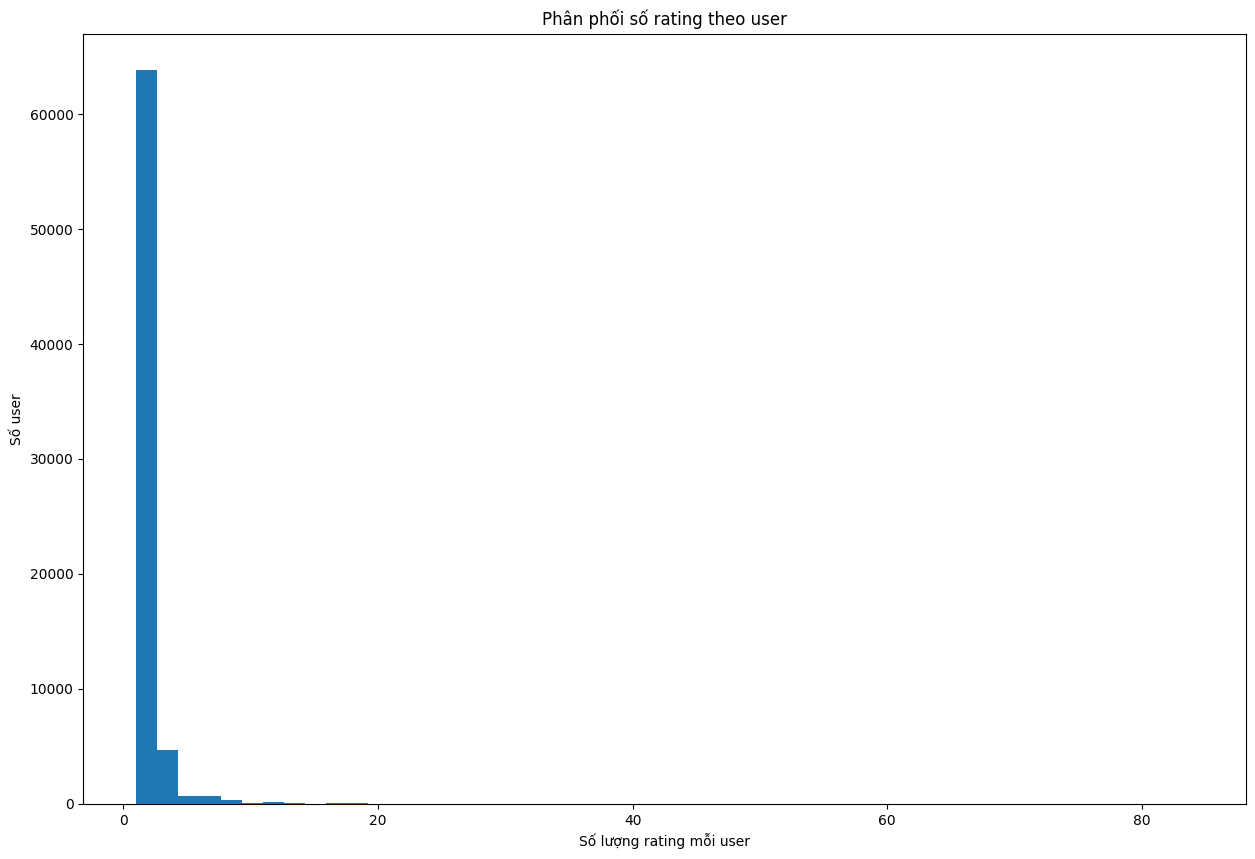

In [48]:
import matplotlib.pyplot as plt

customer_ratings = (
    ratings_with_name.groupby('customer_id')['rating']
    .count()
)

plt.hist(customer_ratings, bins=50)
plt.xlabel("Số lượng rating mỗi user")
plt.ylabel("Số user")
plt.title("Phân phối số rating theo user")
plt.show()


📊 PHÂN TÍCH PHÂN PHỐI SỐ RATING CỦA USERS
📈 Tổng số users: 70,690
📈 Tổng số ratings: 107,524
📈 Trung bình ratings/user: 1.52
📈 Median ratings/user: 1.00
📈 Std ratings/user: 1.76

📊 THỐNG KÊ MÔ TẢ:
count    70690.000000
mean         1.521064
std          1.764002
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         84.000000
Name: total_ratings, dtype: float64


C:\Users\PC\AppData\Local\Temp\ipykernel_11844\2290564851.py:96: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\PC\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


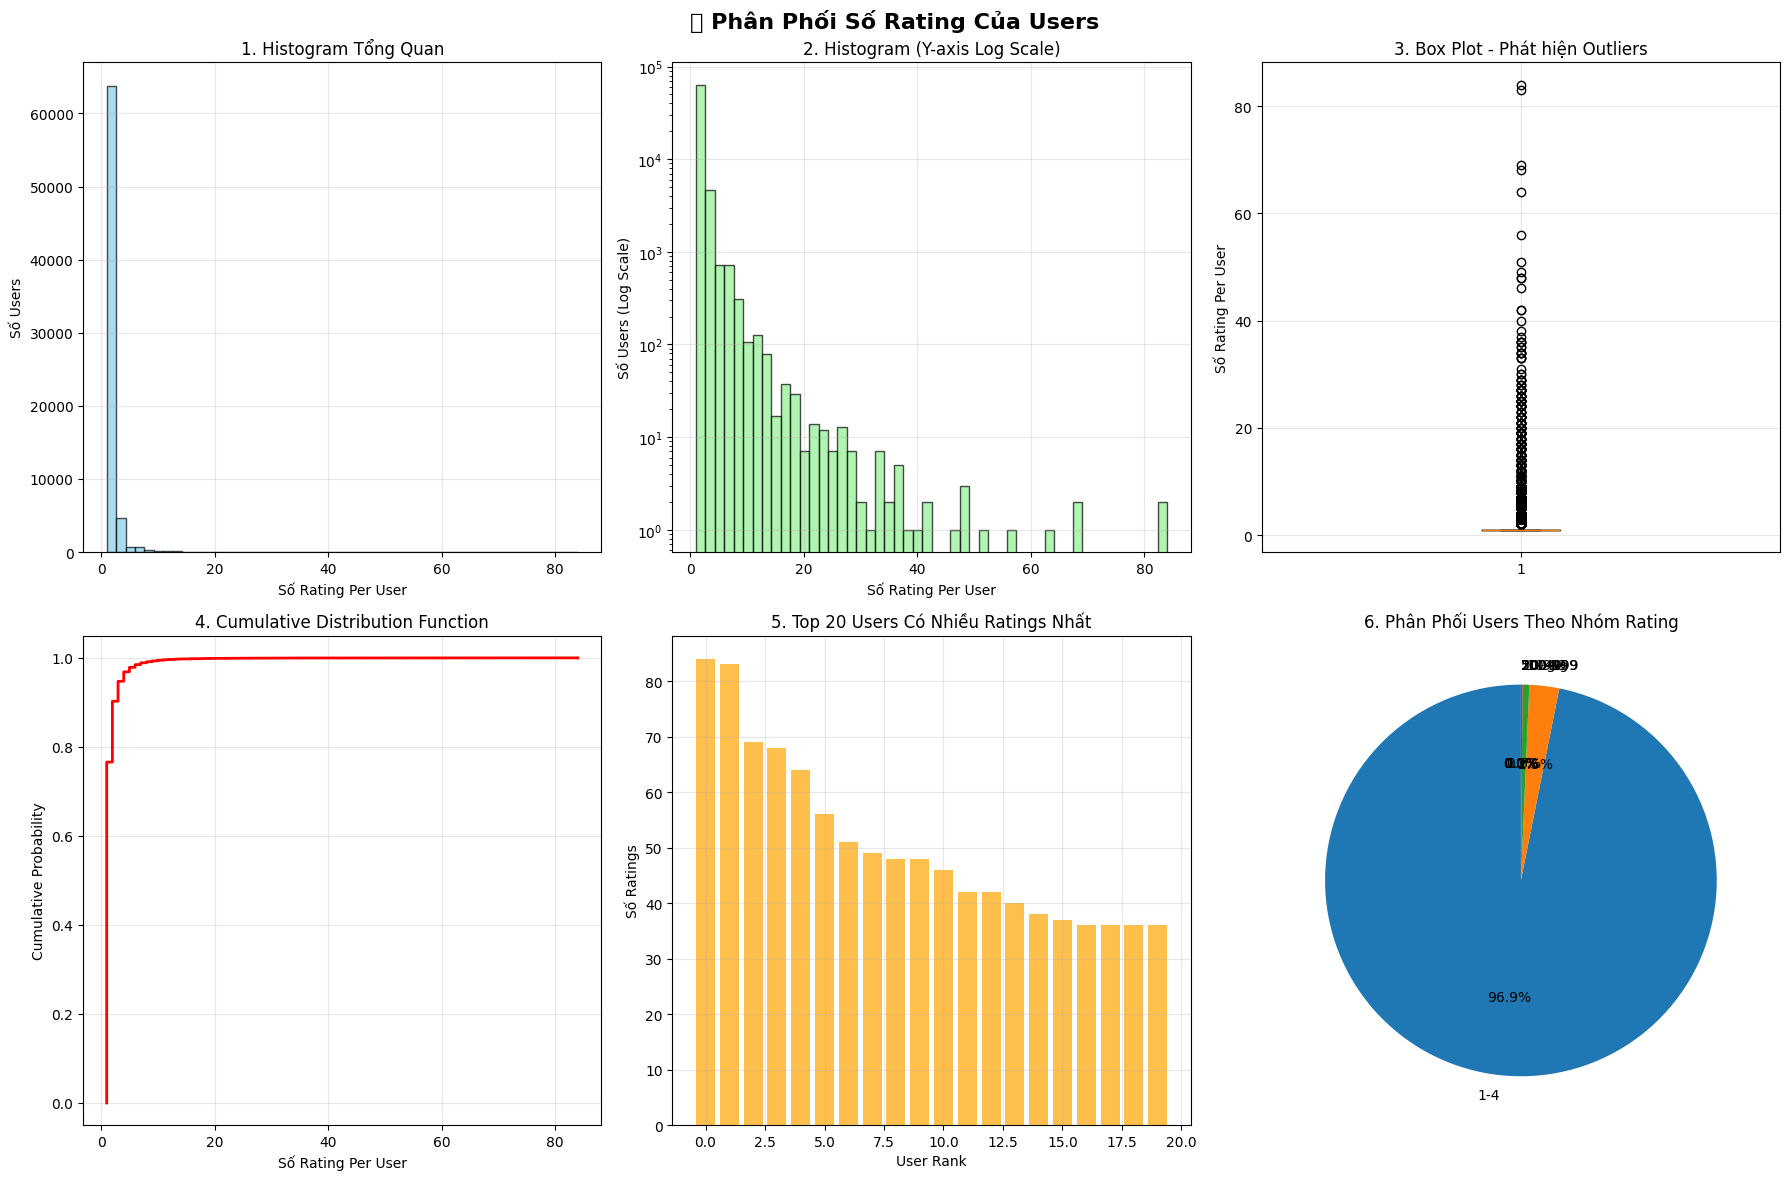


📊 PHÂN PHỐI USERS THEO NHÓM SỐ RATING:
--------------------------------------------------
👥 1-4      ratings: 68,468 users ( 96.9%)
👥 5-9      ratings:  1,735 users (  2.5%)
👥 10-19    ratings:    395 users (  0.6%)
👥 20-49    ratings:     85 users (  0.1%)
👥 50-99    ratings:      7 users (  0.0%)
👥 100-199  ratings:      0 users (  0.0%)
👥 200-499  ratings:      0 users (  0.0%)
👥 500+     ratings:      0 users (  0.0%)


In [49]:
# Phân tích chi tiết phân phối số rating của mỗi user
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.style.use('default')
plt.rcParams['figure.figsize'] = (15, 10)

# Đảm bảo có dữ liệu ratings_with_name
if 'ratings_with_name' not in globals():
    print("Loading data...")
    books = pd.read_csv('prepared_data_book.csv')
    comments = pd.read_csv('comments_cleaned_20250903_233541.csv')
    if 'avg_rating' in books.columns:
        books = books.drop(columns=['avg_rating'])
    
    ratings_with_name = (
        comments.drop(columns=['title'])
                .merge(books, on='product_id')
                .rename(columns={'title': 'book_title'})
    )
    if 'Unnamed: 0' in ratings_with_name.columns:
        ratings_with_name = ratings_with_name.drop(columns=['Unnamed: 0'])

# Tính số rating cho mỗi user
user_rating_counts = (
    ratings_with_name.groupby('customer_id')['rating']
    .count()
    .reset_index(name='total_ratings')
    .sort_values('total_ratings', ascending=False)
)

print("📊 PHÂN TÍCH PHÂN PHỐI SỐ RATING CỦA USERS")
print("="*60)
print(f"📈 Tổng số users: {len(user_rating_counts):,}")
print(f"📈 Tổng số ratings: {user_rating_counts['total_ratings'].sum():,}")
print(f"📈 Trung bình ratings/user: {user_rating_counts['total_ratings'].mean():.2f}")
print(f"📈 Median ratings/user: {user_rating_counts['total_ratings'].median():.2f}")
print(f"📈 Std ratings/user: {user_rating_counts['total_ratings'].std():.2f}")

# Thống kê chi tiết
print(f"\n📊 THỐNG KÊ MÔ TẢ:")
print(user_rating_counts['total_ratings'].describe())

# Tạo subplot với nhiều biểu đồ
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('📊 Phân Phối Số Rating Của Users', fontsize=16, fontweight='bold')

# 1. Histogram tổng quan
axes[0, 0].hist(user_rating_counts['total_ratings'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].set_xlabel('Số Rating Per User')
axes[0, 0].set_ylabel('Số Users')
axes[0, 0].set_title('1. Histogram Tổng Quan')
axes[0, 0].grid(True, alpha=0.3)

# 2. Histogram với log scale
axes[0, 1].hist(user_rating_counts['total_ratings'], bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0, 1].set_xlabel('Số Rating Per User')
axes[0, 1].set_ylabel('Số Users (Log Scale)')
axes[0, 1].set_title('2. Histogram (Y-axis Log Scale)')
axes[0, 1].set_yscale('log')
axes[0, 1].grid(True, alpha=0.3)

# 3. Box plot
box_plot = axes[0, 2].boxplot(user_rating_counts['total_ratings'])
axes[0, 2].set_ylabel('Số Rating Per User')
axes[0, 2].set_title('3. Box Plot - Phát hiện Outliers')
axes[0, 2].grid(True, alpha=0.3)

# 4. CDF (Cumulative Distribution Function)
sorted_ratings = np.sort(user_rating_counts['total_ratings'])
y_cdf = np.arange(1, len(sorted_ratings) + 1) / len(sorted_ratings)
axes[1, 0].plot(sorted_ratings, y_cdf, linewidth=2, color='red')
axes[1, 0].set_xlabel('Số Rating Per User')
axes[1, 0].set_ylabel('Cumulative Probability')
axes[1, 0].set_title('4. Cumulative Distribution Function')
axes[1, 0].grid(True, alpha=0.3)

# 5. Top users bar chart
top_20_users = user_rating_counts.head(20)
axes[1, 1].bar(range(len(top_20_users)), top_20_users['total_ratings'], color='orange', alpha=0.7)
axes[1, 1].set_xlabel('User Rank')
axes[1, 1].set_ylabel('Số Ratings')
axes[1, 1].set_title('5. Top 20 Users Có Nhiều Ratings Nhất')
axes[1, 1].grid(True, alpha=0.3)

# 6. Phân phối theo bins
bins = [1, 5, 10, 20, 50, 100, 200, 500, float('inf')]
labels = ['1-4', '5-9', '10-19', '20-49', '50-99', '100-199', '200-499', '500+']
user_rating_counts['rating_group'] = pd.cut(user_rating_counts['total_ratings'], 
                                          bins=bins, labels=labels, right=False)
group_counts = user_rating_counts['rating_group'].value_counts()

axes[1, 2].pie(group_counts.values, labels=group_counts.index, autopct='%1.1f%%', startangle=90)
axes[1, 2].set_title('6. Phân Phối Users Theo Nhóm Rating')

plt.tight_layout()
plt.show()

# In thống kê theo nhóm
print(f"\n📊 PHÂN PHỐI USERS THEO NHÓM SỐ RATING:")
print("-" * 50)
for group, count in group_counts.items():
    percentage = (count / len(user_rating_counts)) * 100
    print(f"👥 {group:8} ratings: {count:6,} users ({percentage:5.1f}%)")

In [68]:
# Use the customer_ratings DataFrame from cell 24 which has 'num_ratings' column
customer_ratings_df = (
    ratings_with_name
    .groupby('customer_id')['rating']
    .count()
    .reset_index(name='num_ratings')
    .sort_values('num_ratings', ascending=False)
)

thresholds = [5, 10, 20, 30, 40, 50]
for t in thresholds:
    n_users = (customer_ratings_df['num_ratings'] >= t).sum()
    print(f"Số user có >= {t} ratings: {n_users}")

Số user có >= 5 ratings: 2222
Số user có >= 10 ratings: 487
Số user có >= 20 ratings: 92
Số user có >= 30 ratings: 32
Số user có >= 40 ratings: 14
Số user có >= 50 ratings: 7


In [69]:
x = ratings_with_name.groupby('customer_id').count()['rating'] > 10
padhe_likhe_users = x[x].index

In [70]:
filtered_rating = ratings_with_name[ratings_with_name['customer_id'].isin(padhe_likhe_users)]

In [71]:
filtered_rating

,product_id,comment_id,thank_count,customer_id,rating,content,book_title,authors,original_price,current_price,quantity,category,n_review,pages,manufacturer,cover_link,discount
20,74021317,8795196,0,18704745,3,"- Sách còn mới, tuy nhiên góc có vết và keo dá...",Cây Cam Ngọt Của Tôi,José Mauro de Vasconcelos,4.56,2.73,53075,Tiểu Thuyết,11481,244,Nhà Xuất Bản Hội Nhà Văn,https://salt.tikicdn.com/ts/product/5e/18/24/2...,0.40
85,74021317,17107939,0,20396347,5,"Mình biết cuốn này cũng đã lâu rồi, nhưng bây ...",Cây Cam Ngọt Của Tôi,José Mauro de Vasconcelos,4.56,2.73,53075,Tiểu Thuyết,11481,244,Nhà Xuất Bản Hội Nhà Văn,https://salt.tikicdn.com/ts/product/5e/18/24/2...,0.40
105,184466860,18249913,0,24273069,4,"Mình nghĩ sản phẩm này chưa bàn đến nội dung, ...",Hành Tinh Của Một Kẻ Nghĩ Nhiều,Nguyễn Đoàn Minh Thư,3.63,2.53,7929,Others,780,184,Nhà Xuất Bản Thế Giới,https://salt.tikicdn.com/ts/product/d7/99/24/1...,0.30
175,184466860,18351806,0,27029783,5,"Tiki giao hàng nhanh, đóng gói cẩn thận. ...",Hành Tinh Của Một Kẻ Nghĩ Nhiều,Nguyễn Đoàn Minh Thư,3.63,2.53,7929,Others,780,184,Nhà Xuất Bản Thế Giới,https://salt.tikicdn.com/ts/product/d7/99/24/1...,0.30
185,73787185,11801395,18,357419,5,Tiki giao hàng quá tuyệt! Dịch giã thế này vẫn...,Những Tù Nhân Của Địa Lý,Tim Marshall,8.86,5.32,17896,Lĩnh vực khác,3623,430,Nhà Xuất Bản Hội Nhà Văn,https://salt.tikicdn.com/ts/product/8d/96/9e/c...,0.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107330,157579054,15226176,0,24319300,5,Đây là sách về triết học hay và sâu.,Các Vấn Đề Của Triết Học (The Problems Of Phil...,Bertrand Russell,3.59,2.06,147,Others,20,236,Nhà Xuất Bản Khoa Học Xã Hội,https://salt.tikicdn.com/ts/product/a5/52/7f/3...,0.42
107333,157579054,18288928,0,10418172,5,NaN,Các Vấn Đề Của Triết Học (The Problems Of Phil...,Bertrand Russell,3.59,2.06,147,Others,20,236,Nhà Xuất Bản Khoa Học Xã Hội,https://salt.tikicdn.com/ts/product/a5/52/7f/3...,0.42
107335,157579054,18226016,0,16326962,5,NaN,Các Vấn Đề Của Triết Học (The Problems Of Phil...,Bertrand Russell,3.59,2.06,147,Others,20,236,Nhà Xuất Bản Khoa Học Xã Hội,https://salt.tikicdn.com/ts/product/a5/52/7f/3...,0.42
107435,58971672,6886092,0,14052374,5,"Cách đây vài năm, mình có mua cuốn này tại nhà...",The Best of Chicken Soup - Tuyển Tập Những Câu...,Jack Canfield,5.82,3.84,954,Sách nghệ thuật sống đẹp,176,256,Nhà Xuất Bản Tổng hợp TP.HCM,https://salt.tikicdn.com/media/catalog/product...,0.34


In [74]:
book_ratings = (
    filtered_rating
    .groupby('book_title')['rating']
    .count()
    .reset_index(name='num_ratings')
    .sort_values('num_ratings', ascending=False)
)

print(book_ratings.head(10))  # xem top 10 sách có nhiều rating nhất


                                            book_title  num_ratings
78                                 Black Jack - Tập 14           33
781                Người bà tài giỏi vùng Saga – Tập 9           25
520  Ikigami - The Ultimate Limit - Tuyển Tập Những...           24
75                                 Black Jack - Tập 12           24
80                       Black Jack - Tập 15 (Bìa Mềm)           22
492                                  Hình Cảnh Mất Trí           22
77                       Black Jack - Tập 13 (Bìa Mềm)           22
348             DragonBall - 7 viên ngọc rồng ( 1-42 )           22
522                                   Ikigami - Tập 08           21
427                      Gửi em, người bất tử - Tập 13           21


In [75]:
y = filtered_rating.groupby('book_title').count()['rating']>=8
famous_books = y[y].index

In [76]:
final_ratings = filtered_rating[filtered_rating['book_title'].isin(famous_books)]

In [77]:
pt = final_ratings.pivot_table(index='book_title',columns='customer_id',values='rating')

In [78]:
pt.fillna(0,inplace=True)

In [79]:
pt

customer_id,1654,2415,2426,4947,6623,8071,12751,26806,29779,33282,...,27029783,27184816,27532450,27633370,27656632,27730105,27755713,28092104,28168448,28324771
book_title,,,,,,,,,,,,,,,,,,,,,
"""Cậu"" Ma Nhà Xí Hanako - Tập 0",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
12 Quy Luật Cuộc Đời: Thần Dược Cho Cuộc Sống Hiện Đại,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21 Bài Học Cho Thế Kỷ 21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
365 Ngày Thong Dong,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
451 Độ F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Đẹp Và Buồn,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Đồi Thỏ (Tái Bản 2019),0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Đứa Con Gái Hoang Đàng - Hai Số Phận - Phần II,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [80]:
from sklearn.metrics.pairwise import cosine_similarity

In [81]:
similarity_scores = cosine_similarity(pt)

In [82]:
similarity_scores.shape

(257, 257)

In [83]:
def recommend(book_name):
    # Check if book exists in pivot table
    if book_name not in pt.index:
        print(f"Book '{book_name}' not found in the recommendation system.")
        print("Available books in the system:")
        print(pt.index.tolist()[:10])  # Show first 10 available books
        return []
    
    # index fetch
    index = np.where(pt.index==book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:5]
    
    data = []
    for i in similar_items:
        item = []
        temp_df = books[books['title'] == pt.index[i[0]]]  # Use 'title' column from books
        if not temp_df.empty:
            item.extend(list(temp_df.drop_duplicates('title')['title'].values))
            item.extend(list(temp_df.drop_duplicates('title')['authors'].values))
            item.extend(list(temp_df.drop_duplicates('title')['cover_link'].values))
            
            data.append(item)
    
    return data

In [84]:
# Check if the book exists in pivot table
print("Checking if '365 Ngày Thong Dong' exists in pt.index:")
print('365 Ngày Thong Dong' in pt.index)

# Show some available books
print("\nFirst 5 books in the pivot table:")
print(pt.index[:5].tolist())

# Try recommending
recommend('Cây Cam Ngọt Của Tôi')

Checking if '365 Ngày Thong Dong' exists in pt.index:
True

First 5 books in the pivot table:
['"Cậu" Ma Nhà Xí Hanako - Tập 0', '12 Quy Luật Cuộc Đời: Thần Dược Cho Cuộc Sống Hiện Đại', '21 Bài Học Cho Thế Kỷ 21', '365 Ngày Thong Dong', '451 Độ F']
Book 'Cây Cam Ngọt Của Tôi' not found in the recommendation system.
Available books in the system:
['"Cậu" Ma Nhà Xí Hanako - Tập 0', '12 Quy Luật Cuộc Đời: Thần Dược Cho Cuộc Sống Hiện Đại', '21 Bài Học Cho Thế Kỷ 21', '365 Ngày Thong Dong', '451 Độ F', 'Anh Em Phi Hành Gia - Tập 32', 'Anh Em Phi Hành Gia - Tập 33', 'Anh em phi hành gia - Tập 34', 'Anh em phi hành gia - Tập 35', 'Birdmen - Tập 10']


[]

In [85]:
def hybrid_recommend(book_name):
    """
    Hybrid recommendation system:
    - Use collaborative filtering if book is in pivot table
    - Use content-based (same category) if not in pivot table
    """
    
    # Case 1: Book exists in collaborative filtering system
    if book_name in pt.index:
        print(f"Using Collaborative Filtering for '{book_name}'")
        return recommend(book_name)
    
    # Case 2: Book not in pivot table - use content-based approach
    print(f"Book '{book_name}' not in collaborative system. Using content-based approach...")
    
    # Find the book in books dataset
    book_info = books[books['title'] == book_name]
    if book_info.empty:
        print(f"Book '{book_name}' not found in database.")
        return []
    
    # Get book details
    book_category = book_info.iloc[0].get('category', '')
    book_author = book_info.iloc[0]['authors']
    
    print(f"Looking for books in same category: {book_category}")
    
    # Find books in same category
    if book_category and book_category != '':
        same_category_books = books[books['category'] == book_category]
    else:
        print("No category info available. Using author instead.")
        same_category_books = books[books['authors'] == book_author]
    
    # Remove the input book itself
    same_category_books = same_category_books[same_category_books['title'] != book_name]
    
    # Get top 4 books in same category (if available)
    recommendations = []
    for _, book in same_category_books.head(10).iterrows():
        recommendations.append([
            book['title'],
            book['authors'], 
            book['cover_link']
        ])
    
    if recommendations:
        print(f"Found {len(recommendations)} books in same category")
    else:
        print("No books in same category found. Using popular books instead.")
        # Fallback to popular books
        for _, book in popular_df.head(10).iterrows():
            recommendations.append([
                book['book_title'],
                book['authors'],
                book['cover_link']
            ])
    
    return recommendations

In [86]:
# Kiểm tra xem có cột category không
print("Columns in books dataset:", books.columns.tolist())
print("\nSample categories:")
if 'category' in books.columns:
    print(books['category'].value_counts().head(10))
    print(f"\nTotal unique categories: {books['category'].nunique()}")
else:
    print("No 'category' column found in books dataset")

print("\n" + "="*60)

# Test với sách có trong pivot table
print("=== Test 1: Sách có trong Collaborative Filtering ===")
available_book = pt.index[0]  # Lấy sách đầu tiên trong pivot table
print(f"Testing with: {available_book}")
result1 = hybrid_recommend(available_book)

print("\n=== Test 2: Sách KHÔNG có trong Collaborative Filtering ===") 
# Test với sách không có trong pivot table
unavailable_book = "Cây Cam Ngọt Của Tôi"
print(f"Testing with: {unavailable_book}")
result2 = hybrid_recommend(unavailable_book)

Columns in books dataset: ['Unnamed: 0', 'product_id', 'title', 'authors', 'original_price', 'current_price', 'quantity', 'category', 'n_review', 'pages', 'manufacturer', 'cover_link', 'discount']

Sample categories:
category
Others                             766
Tiểu Thuyết                        133
Truyện ngắn - Tản văn - Tạp Văn    108
Sách nghệ thuật sống đẹp            58
Sách kỹ năng làm việc               55
Bài học kinh doanh                  53
Truyện trinh thám                   52
Sách Học Tiếng Anh                  41
Sách tài chính, tiền tệ             40
Sách Marketing - Bán hàng           40
Name: count, dtype: int64

Total unique categories: 30

=== Test 1: Sách có trong Collaborative Filtering ===
Testing with: "Cậu" Ma Nhà Xí Hanako - Tập 0
Using Collaborative Filtering for '"Cậu" Ma Nhà Xí Hanako - Tập 0'

=== Test 2: Sách KHÔNG có trong Collaborative Filtering ===
Testing with: Cây Cam Ngọt Của Tôi
Book 'Cây Cam Ngọt Của Tôi' not in collaborative system. Using con

In [87]:
hybrid_recommend("Cây Cam Ngọt Của Tôi")

Book 'Cây Cam Ngọt Của Tôi' not in collaborative system. Using content-based approach...
Looking for books in same category: Tiểu Thuyết
Found 10 books in same category


[['Một Thoáng Ta Rực Rỡ Ở Nhân Gian',
  'Unknown',
  'https://salt.tikicdn.com/ts/product/2f/b5/4e/a8208e9019c8510e8a8eebe06f50299c.jpg'],
 ['Chiến Binh Cầu Vồng (Tái Bản 2020)',
  'Andrea Hirata',
  'https://salt.tikicdn.com/ts/product/a1/ef/4f/0b39e40dca3827604c8bc4e867cc9423.jpg'],
 ['Cú Săn Đêm',
  'Samuel Bjork',
  'https://salt.tikicdn.com/ts/product/45/6c/b1/1d809c7be82ee19ca6b7ddcb18a494bc.jpg'],
 ['Dám Bị Ghét',
  'Koga Fumitake',
  'https://salt.tikicdn.com/ts/product/74/11/ff/6304c47fec56e6f0b2110be65af0c7c2.jpg'],
 ['Rừng Nauy (Tái Bản)',
  'Haruki Murakami',
  'https://salt.tikicdn.com/ts/product/c9/e4/18/a9cfc425fa590c453f20307229804bb3.jpg'],
 ['Bố Con Cá Gai (Tái Bản 2019)',
  'Cho Chang - In',
  'https://salt.tikicdn.com/ts/product/85/b4/a3/dc8b8311f434cc946563963bc8e30071.jpg'],
 ['Hiệu Sách Nhỏ Ở Paris',
  'Nina George',
  'https://salt.tikicdn.com/ts/product/7c/0d/6c/8fcbd6abc1ac716d07b3593f9b97f53b.jpg'],
 ['Bắt Trẻ Đồng Xanh (Tái Bản 2020)',
  'Jerome David Saling

## Machine Learning User-Based Recommender System (Matrix Factorization)

In [19]:
# Cài đặt thư viện cần thiết cho Matrix Factorization
!pip install scikit-surprise

You should consider upgrading via the 'C:\Users\PC\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [88]:
from surprise import Dataset, Reader, SVD, NMF
from surprise.model_selection import train_test_split, cross_validate
from surprise import accuracy
import pandas as pd

# Chuẩn bị dữ liệu cho Surprise library
print("Preparing data for Matrix Factorization...")
print(f"Original ratings shape: {ratings_with_name.shape}")

# Tạo dataset nhỏ hơn để train nhanh (có thể điều chỉnh)
ml_data = ratings_with_name[['customer_id', 'book_title', 'rating']].copy()

# Lọc dữ liệu: chỉ lấy user và book có ít nhất 5 ratings
user_counts = ml_data.groupby('customer_id').size()
user_counts
book_counts = ml_data.groupby('book_title').size()
book_counts
active_users = user_counts[user_counts >= 2].index
popular_books = book_counts[book_counts >= 2].index

ml_data_filtered = ml_data[
    (ml_data['customer_id'].isin(active_users)) & 
    (ml_data['book_title'].isin(popular_books))
]

print(f"Filtered data shape: {ml_data_filtered.shape}")
print(f"Unique users: {ml_data_filtered['customer_id'].nunique()}")
print(f"Unique books: {ml_data_filtered['book_title'].nunique()}")
print(f"Sparsity: {1 - len(ml_data_filtered) / (ml_data_filtered['customer_id'].nunique() * ml_data_filtered['book_title'].nunique()):.4f}")

ml_data_filtered.head()

Preparing data for Matrix Factorization...
Original ratings shape: (107524, 17)
Filtered data shape: (53370, 3)
Unique users: 16559
Unique books: 1696
Sparsity: 0.9981


,customer_id,book_title,rating
0,22051463,Cây Cam Ngọt Của Tôi,5
1,27791831,Cây Cam Ngọt Của Tôi,5
2,17748750,Cây Cam Ngọt Của Tôi,5
5,24792909,Cây Cam Ngọt Của Tôi,3
6,10149686,Cây Cam Ngọt Của Tôi,5


In [81]:
active_users

Index([     247,     1176,     1196,     1654,     2415,     2426,     2970,
           3720,     4947,     5666,
       ...
       28319258, 28324771, 28340837, 28360163, 28386880, 28416332, 28443926,
       28448421, 28456214, 28535730],
      dtype='int64', name='customer_id', length=2222)

In [89]:
# Tạo Surprise Dataset
reader = Reader(rating_scale=(1, 5))  # Giả sử rating từ 1-5
surprise_data = Dataset.load_from_df(ml_data_filtered[['customer_id', 'book_title', 'rating']], reader)

# Chia train/test
trainset, testset = train_test_split(surprise_data, test_size=0.2, random_state=42)

print(f"Trainset size: {trainset.n_ratings}")
print(f"Testset size: {len(testset)}")

# Train SVD model (Matrix Factorization)
print("\\nTraining SVD (Singular Value Decomposition) model...")
svd_model = SVD(
    n_factors=10,        # Số latent factors
    n_epochs=20,         # Số epochs
    lr_all=0.005,        # Learning rate
    reg_all=0.02,        # Regularization
    random_state=42
)

svd_model.fit(trainset)
print("SVD model trained successfully!")

Trainset size: 42696
Testset size: 10674
\nTraining SVD (Singular Value Decomposition) model...
SVD model trained successfully!
SVD model trained successfully!


In [90]:
# Đánh giá model
predictions = svd_model.test(testset)
rmse = accuracy.rmse(predictions, verbose=False)
mae = accuracy.mae(predictions, verbose=False)

print(f"SVD Model Performance:")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

# Cross-validation để đánh giá tổng quát hơn
print("\\nPerforming 5-fold cross-validation...")
cv_results = cross_validate(svd_model, surprise_data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

print(f"\\nCross-validation Results:")
print(f"Mean RMSE: {cv_results['test_rmse'].mean():.4f} (+/- {cv_results['test_rmse'].std() * 2:.4f})")
print(f"Mean MAE: {cv_results['test_mae'].mean():.4f} (+/- {cv_results['test_mae'].std() * 2:.4f})")

SVD Model Performance:
RMSE: 0.7166
MAE: 0.4088
\nPerforming 5-fold cross-validation...
Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.6865  0.7214  0.6922  0.7114  0.7217  0.7066  0.0147  
MAE (testset)     0.4007  0.4140  0.4016  0.4092  0.4146  0.4080  0.0059  
Fit time          0.40    0.35    0.35    0.38    0.34    0.36    0.02    
Test time         0.19    0.06    0.06    0.16    0.06    0.10    0.06    
\nCross-validation Results:
Mean RMSE: 0.7066 (+/- 0.0294)
Mean MAE: 0.4080 (+/- 0.0118)
Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.6865  0.7214  0.6922  0.7114  0.7217  0.7066  0.0147  
MAE (testset)     0.4007  0.4140  0.4016  0.4092  0.4146  0.4080  0.0059  
Fit time          0.40    0.35    0.35    0.38    0.34    0.36    0.02    
Test time         0.19    0.06    0.06  

In [91]:
def ml_recommend_for_user(user_id, n_recommendations=5):
    """
    Gợi ý sách cho user dựa trên Matrix Factorization (SVD)
    """
    # Lấy tất cả sách trong hệ thống
    all_books = ml_data_filtered['book_title'].unique()
    
    # Lấy sách mà user đã đánh giá
    user_rated_books = ml_data_filtered[ml_data_filtered['customer_id'] == user_id]['book_title'].unique()
    
    # Tìm sách chưa được đánh giá
    unrated_books = [book for book in all_books if book not in user_rated_books]
    
    # Dự đoán rating cho các sách chưa đánh giá
    predictions = []
    for book in unrated_books:
        pred = svd_model.predict(user_id, book)
        predictions.append((book, pred.est))
    
    # Sắp xếp theo predicted rating giảm dần
    predictions.sort(key=lambda x: x[1], reverse=True)
    
    # Lấy top N recommendations
    top_recommendations = predictions[:n_recommendations]
    
    # Format kết quả
    recommendations = []
    for book_title, predicted_rating in top_recommendations:
        book_info = books[books['title'] == book_title]
        if not book_info.empty:
            book_info = book_info.iloc[0]
            recommendations.append({
                'title': book_title,
                'author': book_info['authors'],
                'predicted_rating': round(predicted_rating, 2),
                'cover_link': book_info['cover_link']
            })
    
    return recommendations

def ml_recommend_similar_users(user_id, n_recommendations=5):
    """
    Tìm user tương tự và gợi ý sách dựa trên sở thích của họ
    """
    # Lấy tất cả user khác
    all_users = ml_data_filtered['customer_id'].unique()
    other_users = [u for u in all_users if u != user_id]
    
    # Tính similarity với các user khác dựa trên latent factors
    target_user_factors = svd_model.pu[trainset.to_inner_uid(user_id)]
    
    user_similarities = []
    for other_user in other_users:
        try:
            other_user_factors = svd_model.pu[trainset.to_inner_uid(other_user)]
            # Cosine similarity
            similarity = np.dot(target_user_factors, other_user_factors) / (
                np.linalg.norm(target_user_factors) * np.linalg.norm(other_user_factors)
            )
            user_similarities.append((other_user, similarity))
        except:
            continue
    
    # Sắp xếp theo similarity
    user_similarities.sort(key=lambda x: x[1], reverse=True)
    
    # Lấy top 10 user tương tự nhất
    similar_users = [u[0] for u in user_similarities[:10]]
    
    # Lấy sách được đánh giá cao bởi similar users
    target_user_books = set(ml_data_filtered[ml_data_filtered['customer_id'] == user_id]['book_title'])
    
    book_scores = {}
    for sim_user in similar_users:
        sim_user_books = ml_data_filtered[
            (ml_data_filtered['customer_id'] == sim_user) & 
            (ml_data_filtered['rating'] >= 4)  # Chỉ lấy rating cao
        ]
        
        for _, row in sim_user_books.iterrows():
            if row['book_title'] not in target_user_books:
                if row['book_title'] in book_scores:
                    book_scores[row['book_title']] += row['rating']
                else:
                    book_scores[row['book_title']] = row['rating']
    
    # Sắp xếp và lấy top recommendations
    recommended_books = sorted(book_scores.items(), key=lambda x: x[1], reverse=True)[:n_recommendations]
    
    # Format kết quả
    recommendations = []
    for book_title, score in recommended_books:
        book_info = books[books['title'] == book_title]
        if not book_info.empty:
            book_info = book_info.iloc[0]
            recommendations.append({
                'title': book_title,
                'author': book_info['authors'],
                'score': round(score, 2),
                'cover_link': book_info['cover_link']
            })
    
    return recommendations

In [92]:
# Test ML-based recommendations
print("=== Testing ML-based Recommendations ===")

# Lấy một user có nhiều ratings để test
sample_user = ml_data_filtered.groupby('customer_id').size().sort_values(ascending=False).index[0]
print(f"Testing with user: {sample_user}")

# Xem lịch sử đánh giá của user
user_history = ml_data_filtered[ml_data_filtered['customer_id'] == sample_user].sort_values('rating', ascending=False)
print(f"\\nUser's rating history (top 5):")
print(user_history[['book_title', 'rating']].head())

print(f"\\n--- Method 1: Matrix Factorization Predictions ---")
svd_recommendations = ml_recommend_for_user(sample_user, n_recommendations=5)
for i, rec in enumerate(svd_recommendations, 1):
    print(f"{i}. {rec['title']} - {rec['author']} (Predicted: {rec['predicted_rating']})")

print(f"\\n--- Method 2: Similar Users Approach ---")
similar_user_recommendations = ml_recommend_similar_users(sample_user, n_recommendations=5)
for i, rec in enumerate(similar_user_recommendations, 1):
    print(f"{i}. {rec['title']} - {rec['author']} (Score: {rec['score']})")

=== Testing ML-based Recommendations ===
Testing with user: 12088578
\nUser's rating history (top 5):
                                              book_title  rating
615                                     Thao Túng Tâm Lý       5
58659      Sách - Sức Mạnh Của Sự Trầm Lắng - First News       5
70384  Món Quà Của Linh Hồn - \nSức Mạnh Chữa Lành Củ...       5
69848          NGÀI CÓC ĐI GẶP BÁC SĨ TÂM LÝ ( BÌA CỨNG)       5
67630         Sách Đen - Bộ Công Cụ Của Phụ Nữ Thành Đạt       5
\n--- Method 1: Matrix Factorization Predictions ---
1. Yêu Những Điều Không Hoàn Hảo - Hae Min (Predicted: 5)
2. Quyền Lực Của Địa Lý - The Power Of Geography - Tim Marshall (Predicted: 5)
3. Đại Dương Đen - Những Câu Chuyện Từ Thế Giới Của Trầm Cảm - Đặng Hoàng Giang (Predicted: 5)
4. Những Người Khốn Khổ (Boxet 2 Tập) - Victor Hugo (Predicted: 5)
5. Tiếng Núi - Kawabata Yasunari (Predicted: 5)
\n--- Method 2: Similar Users Approach ---
1. Combo Muôn kiếp nhân sinh 1 (53160) (khổ nhỏ) + Muôn kiếp nhân

In [93]:
# Phân tích chi tiết user similarity
def analyze_user_similarity(target_user_id, top_n=10):
    """
    Phân tích xem user hiện tại tương đồng với user nào
    """
    target_user_id = 162872 
    print(f"🔍 PHÂN TÍCH TƯƠNG ĐỒNG CHO USER {target_user_id}")
    print("="*70)
    
    # Xem sở thích của target user
    target_history = ml_data_filtered[ml_data_filtered['customer_id'] == target_user_id]
    print(f"📚 Sở thích của User {target_user_id}:")
    print(f"   - Tổng số sách đã đánh giá: {len(target_history)}")
    print(f"   - Điểm trung bình: {target_history['rating'].mean():.2f}")
    print(f"   - Sách yêu thích nhất (rating 5):")
    
    favorite_books = target_history[target_history['rating'] == 5]['book_title'].tolist()
    for i, book in enumerate(favorite_books[:5], 1):
        print(f"      {i}. {book}")
    
    # Tính similarity với tất cả user khác
    all_users = ml_data_filtered['customer_id'].unique()
    other_users = [u for u in all_users if u != target_user_id]
    
    target_user_factors = svd_model.pu[trainset.to_inner_uid(target_user_id)]
    
    user_similarities = []
    for other_user in other_users:
        try:
            other_user_factors = svd_model.pu[trainset.to_inner_uid(other_user)]
            # Cosine similarity
            similarity = np.dot(target_user_factors, other_user_factors) / (
                np.linalg.norm(target_user_factors) * np.linalg.norm(other_user_factors)
            )
            user_similarities.append((other_user, similarity))
        except:
            continue
    
    # Sắp xếp theo similarity giảm dần
    user_similarities.sort(key=lambda x: x[1], reverse=True)
    
    print(f"\n👥 TOP {top_n} USER TƯƠNG ĐỒNG NHẤT:")
    print("-"*70)
    
    for i, (similar_user, similarity_score) in enumerate(user_similarities[:top_n], 1):
        # Lấy thông tin về similar user
        similar_history = ml_data_filtered[ml_data_filtered['customer_id'] == similar_user]
        similar_avg = similar_history['rating'].mean()
        
        # Tìm sách chung giữa 2 users
        target_books = set(target_history['book_title'])
        similar_books = set(similar_history['book_title'])
        common_books = target_books.intersection(similar_books)
        
        print(f"{i:2d}. User {similar_user} (Tương đồng: {similarity_score:.4f})")
        print(f"    📊 Số sách đánh giá: {len(similar_history)}")
        print(f"    ⭐ Điểm TB: {similar_avg:.2f}")
        print(f"    🤝 Sách chung: {len(common_books)} cuốn")
        
        # Hiển thị một số sách chung nếu có
        if common_books:
            common_sample = list(common_books)[:3]
            for book in common_sample:
                target_rating = target_history[target_history['book_title'] == book]['rating'].iloc[0]
                similar_rating = similar_history[similar_history['book_title'] == book]['rating'].iloc[0]
                print(f"       📖 {book[:50]}{'...' if len(book) > 50 else ''}")
                print(f"          You: {target_rating}⭐ | User {similar_user}: {similar_rating}⭐")
        
        print()
    
    # Phân tích nhóm users tương đồng
    top_similar_users = [u[0] for u in user_similarities[:5]]
    
    print("🎯 PHÂN TÍCH NHÓM USERS TƯƠNG ĐỒNG:")
    print("-"*50)
    
    # Tìm sách được nhóm này yêu thích
    group_favorites = {}
    for sim_user in top_similar_users:
        sim_books = ml_data_filtered[
            (ml_data_filtered['customer_id'] == sim_user) & 
            (ml_data_filtered['rating'] >= 4)
        ]
        
        for _, row in sim_books.iterrows():
            book = row['book_title']
            if book not in target_history['book_title'].values:  # Chưa đọc
                if book in group_favorites:
                    group_favorites[book] += row['rating']
                else:
                    group_favorites[book] = row['rating']
    
    # Top recommendations từ nhóm tương đồng
    group_recommendations = sorted(group_favorites.items(), key=lambda x: x[1], reverse=True)[:5]
    
    print("📚 SÁCH ĐƯỢC NHÓM TƯƠNG ĐỒNG YÊU THÍCH (bạn chưa đọc):")
    for i, (book, total_score) in enumerate(group_recommendations, 1):
        print(f"{i}. {book} (Tổng điểm: {total_score})")
    
    return user_similarities[:top_n]

# Test với user mẫu
sample_user = ml_data_filtered.groupby('customer_id').size().sort_values(ascending=False).index[0]
similarity_results = analyze_user_similarity(sample_user, top_n=8)

🔍 PHÂN TÍCH TƯƠNG ĐỒNG CHO USER 162872
📚 Sở thích của User 162872:
   - Tổng số sách đã đánh giá: 6
   - Điểm trung bình: 4.83
   - Sách yêu thích nhất (rating 5):
      1. Người con
      2. Bitna Dưới Bầu Trời Seoul
      3. Lính Trơn - Khoa Học Lạ Kỳ Về Loài Người Trong Chiến Tranh
      4. Sự Trỗi Dạy Và Suy Tàn Của Đế Chế Thứ 3 (Tái Bản)
      5. Buồng Tắm

👥 TOP 8 USER TƯƠNG ĐỒNG NHẤT:
----------------------------------------------------------------------
 1. User 1827148 (Tương đồng: 0.8929)
    📊 Số sách đánh giá: 3
    ⭐ Điểm TB: 5.00
    🤝 Sách chung: 0 cuốn

 2. User 16478449 (Tương đồng: 0.8918)
    📊 Số sách đánh giá: 2
    ⭐ Điểm TB: 5.00
    🤝 Sách chung: 0 cuốn

 3. User 22925881 (Tương đồng: 0.8862)
    📊 Số sách đánh giá: 2
    ⭐ Điểm TB: 5.00
    🤝 Sách chung: 0 cuốn

 4. User 20453871 (Tương đồng: 0.8823)
    📊 Số sách đánh giá: 2
    ⭐ Điểm TB: 4.00
    🤝 Sách chung: 0 cuốn

 5. User 19315506 (Tương đồng: 0.8802)
    📊 Số sách đánh giá: 2
    ⭐ Điểm TB: 4.50
    🤝 

In [94]:
import pickle
pickle.dump(popular_df,open('popular_new.pkl','wb'))

In [95]:
books.drop_duplicates('title')

,Unnamed: 0,product_id,title,authors,original_price,current_price,quantity,category,n_review,pages,manufacturer,cover_link,discount
0,0,74021317,Cây Cam Ngọt Của Tôi,José Mauro de Vasconcelos,4.56,2.73,53075,Tiểu Thuyết,11481,244,Nhà Xuất Bản Hội Nhà Văn,https://salt.tikicdn.com/ts/product/5e/18/24/2...,0.40
1,2,184466860,Hành Tinh Của Một Kẻ Nghĩ Nhiều,Nguyễn Đoàn Minh Thư,3.63,2.53,7929,Others,780,184,Nhà Xuất Bản Thế Giới,https://salt.tikicdn.com/ts/product/d7/99/24/1...,0.30
2,3,73787185,Những Tù Nhân Của Địa Lý,Tim Marshall,8.86,5.32,17896,Lĩnh vực khác,3623,430,Nhà Xuất Bản Hội Nhà Văn,https://salt.tikicdn.com/ts/product/8d/96/9e/c...,0.40
3,4,52789367,Nhà Giả Kim (Tái Bản 2020),Paulo Coelho,3.33,2.00,24668,Tác phẩm kinh điển,5131,228,Nhà Xuất Bản Hà Nội,https://salt.tikicdn.com/ts/product/45/3b/fc/a...,0.40
4,5,147920903,Một Thoáng Ta Rực Rỡ Ở Nhân Gian,Unknown,5.70,3.42,10000,Tiểu Thuyết,1636,304,Nhà Xuất Bản Hội Nhà Văn,https://salt.tikicdn.com/ts/product/2f/b5/4e/a...,0.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1762,1791,192949122,7 Thói Quen Hiệu Quả - The 7 Habits Of Highly ...,Stephen R Covey,10.55,8.07,76,Others,7,456,Nhà Xuất Bản Tổng hợp TP.HCM,https://salt.tikicdn.com/ts/product/ba/c3/c0/1...,0.24
1763,1792,157579054,Các Vấn Đề Của Triết Học (The Problems Of Phil...,Bertrand Russell,3.59,2.06,147,Others,20,236,Nhà Xuất Bản Khoa Học Xã Hội,https://salt.tikicdn.com/ts/product/a5/52/7f/3...,0.42
1764,1793,20704715,Để Con Được Chích - Hiểu Hết Về Vắc Xin Và Miễ...,Uyên Bùi,4.56,1.82,931,Sách Làm Cha Mẹ,47,296,Unknown,https://salt.tikicdn.com/ts/product/05/15/e0/1...,0.60
1765,1794,131144753,Nhà Lãnh Đạo 360 Độ (Tái Bản),John C. Maxwell,7.55,4.54,378,"Sách quản trị, lãnh đạo",33,436,Nhà Xuất Bản Lao Động,https://salt.tikicdn.com/ts/product/fd/bd/40/8...,0.40


In [96]:
pickle.dump(pt,open('pt_new.pkl','wb'))
pickle.dump(books,open('books_new.pkl','wb'))
pickle.dump(similarity_scores,open('similarity_scores_new.pkl','wb'))

In [97]:
# Lưu SVD model và dữ liệu ML để sử dụng lại
print("Saving ML models and data...")

# Lưu SVD model
import joblib
joblib.dump(svd_model, 'svd_model.pkl')

# Lưu các dữ liệu cần thiết cho ML recommendations
pickle.dump(ml_data_filtered, open('ml_data_filtered.pkl', 'wb'))
pickle.dump(trainset, open('trainset.pkl', 'wb'))

print("Saved files:")
print("- svd_model.pkl (SVD Matrix Factorization model)")
print("- ml_data_filtered.pkl (Filtered ML dataset)")  
print("- trainset.pkl (Training set for user/book ID mapping)")
print("- popular_new.pkl (Popular books)")
print("- pt_new.pkl (Pivot table for collaborative filtering)")
print("- books_new.pkl (Books dataset)")
print("- similarity_scores_new.pkl (Similarity matrix)")

print("\nAll models saved successfully! 🎉")

Saving ML models and data...
Saved files:
- svd_model.pkl (SVD Matrix Factorization model)
- ml_data_filtered.pkl (Filtered ML dataset)
- trainset.pkl (Training set for user/book ID mapping)
- popular_new.pkl (Popular books)
- pt_new.pkl (Pivot table for collaborative filtering)
- books_new.pkl (Books dataset)
- similarity_scores_new.pkl (Similarity matrix)

All models saved successfully! 🎉
Saved files:
- svd_model.pkl (SVD Matrix Factorization model)
- ml_data_filtered.pkl (Filtered ML dataset)
- trainset.pkl (Training set for user/book ID mapping)
- popular_new.pkl (Popular books)
- pt_new.pkl (Pivot table for collaborative filtering)
- books_new.pkl (Books dataset)
- similarity_scores_new.pkl (Similarity matrix)

All models saved successfully! 🎉


## Load Saved Models (For Future Use)

In [ ]:
# Code để load lại models đã lưu (sử dụng khi restart notebook)
def load_saved_models():
    """
    Load all saved models and data
    Chỉ chạy function này khi cần load lại models mà không muốn train lại
    """
    global svd_model, ml_data_filtered, trainset, popular_df, pt, books, similarity_scores
    
    print("Loading saved models...")
    
    try:
        # Load SVD model
        import joblib
        svd_model = joblib.load('svd_model.pkl')
        print("✅ SVD model loaded")
        
        # Load ML data
        ml_data_filtered = pickle.load(open('ml_data_filtered.pkl', 'rb'))
        print("✅ ML filtered data loaded")
        
        # Load trainset
        trainset = pickle.load(open('trainset.pkl', 'rb'))
        print("✅ Trainset loaded")
        
        # Load other models
        popular_df = pickle.load(open('popular_new.pkl', 'rb'))
        print("✅ Popular books loaded")
        
        pt = pickle.load(open('pt_new.pkl', 'rb'))
        print("✅ Pivot table loaded")
        
        books = pickle.load(open('books_new.pkl', 'rb'))
        print("✅ Books data loaded")
        
        similarity_scores = pickle.load(open('similarity_scores_new.pkl', 'rb'))
        print("✅ Similarity scores loaded")
        
        print("\n🎉 All models loaded successfully!")
        print(f"SVD model ready with {ml_data_filtered.shape[0]} ratings")
        print(f"Collaborative filtering ready with {pt.shape[0]} books")
        
    except FileNotFoundError as e:
        print(f"❌ Error: {e}")
        print("Please run the training cells first!")
    except Exception as e:
        print(f"❌ Unexpected error: {e}")

# Uncomment the line below to load models
# load_saved_models()

In [ ]:
# Thử nghiệm với các threshold khác nhau để có dataset lớn hơn
def experiment_different_thresholds():
    """
    Thử các threshold khác nhau để xem ảnh hưởng đến size và performance
    """
    print("🧪 EXPERIMENTING WITH DIFFERENT THRESHOLDS 🧪")
    print("="*60)
    
    thresholds = [(3, 3), (4, 4), (5, 5), (6, 6), (10, 10)]
    
    for user_thresh, book_thresh in thresholds:
        # Lọc data
        ml_data = ratings_with_name[['customer_id', 'book_title', 'rating']].copy()
        
        user_counts = ml_data.groupby('customer_id').size()
        book_counts = ml_data.groupby('book_title').size()
        
        active_users = user_counts[user_counts >= user_thresh].index
        popular_books = book_counts[book_counts >= book_thresh].index
        
        filtered_data = ml_data[
            (ml_data['customer_id'].isin(active_users)) & 
            (ml_data['book_title'].isin(popular_books))
        ]
        
        sparsity = 1 - len(filtered_data) / (
            filtered_data['customer_id'].nunique() * 
            filtered_data['book_title'].nunique()
        )
        
        print(f"Threshold ≥{user_thresh}: {filtered_data.shape[0]:,} ratings, "
              f"{filtered_data['customer_id'].nunique():,} users, "
              f"{filtered_data['book_title'].nunique():,} books, "
              f"Sparsity: {sparsity:.3f}")
    
    print("\n💡 Hiện tại đang dùng threshold ≥5 (cân bằng tốt giữa size và quality)")
    print("💡 Có thể thử ≥3 để có dataset lớn hơn (nhưng có thể noisy hơn)")

# Uncomment để chạy experiment
# experiment_different_thresholds()